<a href="https://colab.research.google.com/github/hobingzhao/data_science_showcase/blob/main/Uber_Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uber Regression Practice

Dataset taken from Kaggle. An example of doing Linear Regression with extensive feature engineering and analysis.
https://www.kaggle.com/datasets/yasserh/uber-fares-dataset/data

Done by Ho Bing Zhao

In [ ]:
!pip install cartopy

# **Comprehensive Steps for Linear Regression Analysis (Including Regularization)**

This is an iterative, multi-step process for building a reliable and valid regression model.

#### Phase 1: Problem Definition & Data Collection

1. **Define the Research Question:**  
   * Clearly identify the dependent variable (Y) and the potential independent variables (X1​,X2​,...).  
   * Formulate a testable hypothesis.  
2. **Collect Data:**  
   * Gather relevant data, ensuring it is appropriate for your research goals and ideally, a representative sample.

#### Phase 2: Data Exploration & Preparation

1. **Exploratory Data Analysis (EDA):**  
   * Examine summary statistics (mean, median, etc.) and check for missing values and data types.  
   * Visualize the data using scatter plots, histograms, and correlation matrices to understand variable distributions and relationships.  
2. **Data Cleaning & Preprocessing:**  
   * Handle missing values by imputation or removal.  
   * Address outliers and encoding categorical variables.  
   * Apply variable transformations (e.g., log, sqrt) if non-linear relationships or skewed distributions are present.  
   * **Scale predictors** if using regularized methods like Ridge or Lasso.

#### Phase 3: Model Specification & Estimation

1. **Split Data (for Prediction):**  
   * Divide the dataset into a **training set** (for model building) and an **unseen test set** (for final evaluation).  
2. **Specify the Model:**  
   * Select the predictors to include based on theory and EDA findings.  
   * Add interaction or polynomial terms if necessary, following the hierarchical principle.  
3. **Estimate the Model:**  
   * Fit the model to the training data using an appropriate method (e.g., Ordinary Least Squares).

#### Phase 4: Model Diagnostics & Refinement

1. **Check for Linearity:**  
   * **Diagnostic:** Analyze a plot of residuals vs. fitted values.  
   * **Remedy:** Transform variables or add polynomial terms.  
2. **Check for Independence of Errors (No Autocorrelation):**  
   * **Diagnostic:** Use a Durbin-Watson test or a plot of residuals over time (for time series data).  
   * **Remedy:** Add lagged variables, use time-series models, or use robust standard errors.  
3. **Check for Homoscedasticity (Constant Variance):**  
   * **Diagnostic:** Look for a "funnel" pattern in the residuals vs. fitted values plot.  
   * **Remedy:** Transform the dependent variable, use Weighted Least Squares (WLS), or use robust standard errors.  
4. **Check for Normality of Residuals:**  
   * **Diagnostic:** Use a Q-Q plot or histogram of the residuals.  
   * **Remedy:** Consider variable transformations. The model is robust to violations with large sample sizes.  
5. **Detect Outliers & High-Leverage Points:**  
   * **Diagnostic:** Use metrics like Cook's distance, leverage values (hii​), and studentized residuals.  
   * **Remedy:** Investigate, and if appropriate, remove or down-weight the influential points (e.g., using robust regression).  
6. **Detect Multicollinearity:**  
   * **Diagnostic:** Check a correlation matrix and calculate the Variance Inflation Factor (VIF).  
   * **Remedy:** Remove redundant variables, combine predictors, or use penalized regression (Ridge/Lasso).  
7. **Refine the Model:**  
   * Iterate through the previous steps, adjusting the model as needed based on the diagnostic findings.

#### Phase 5: Interpretation & Evaluation

1. **Interpret Model Parameters:**  
   * Explain the coefficients and intercept in simple, practical terms.  
2. **Evaluate Overall Fit:**  
   * Review the F-statistic (for overall model significance), Adjusted R-squared (for explanatory power), and Residual Standard Error (RSE) (for typical prediction error).  
3. **Assess Predictive Performance:**  
   * If a test set was used, report final metrics (e.g., RMSE, R-squared) to provide an unbiased evaluation of the model's performance on new data.  
4. **Conclude:**  
   * Summarize your findings, discuss the model's limitations, and suggest next steps.

# Phase 1: Problem Definition & Data Collection / Data Exploration & Preparation

1. **Define the Research Question:**  
   * Clearly identify the dependent variable (Y) and the potential independent variables (X1​,X2​,...).  
   * Formulate a testable hypothesis.  
2. **Collect Data:**  
   * Gather relevant data, ensuring it is appropriate for your research goals and ideally, a representative sample.

** Define the Research Question**

The dataset contains the following fields:
* key - a unique identifier for each trip
* fare_amount - the cost of each trip in usd <- Y

independent variables, but need to be transformed and analyzed first
* pickup_datetime - date and time when the meter was engaged
* passenger_count - the number of passengers in the vehicle (driver entered value)
* pickup_longitude - the longitude where the meter was engaged
* pickup_latitude - the latitude where the meter was engaged
* dropoff_longitude - the longitude where the meter was disengaged
* dropoff_latitude - the latitude where the meter was disengaged

Our hypothesis is that these data can be used to predict fare_amount for future rides

**Collect Data**

Data is from kaggle, no collection needed.


In [ ]:
# import kaggle dataset
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("yasserh/uber-fares-dataset")
print("Path to dataset files:", path)

# The path was printed in the output of the previous cell.
csv_file_path = os.path.join(path, 'uber.csv')

df = pd.read_csv(csv_file_path)
df = df.rename(columns={'Unnamed: 0': 'index'})
display(df.head())
display(df.dtypes)

# get original df size
original_data_row_count = df.shape[0]
print(f"Original Data Row Count: {original_data_row_count}")

Path to dataset files: /kaggle/input/uber-fares-dataset


,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


,0
index,int64
key,object
fare_amount,float64
pickup_datetime,object
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64


Original Data Row Count: 200000


# Phase 2: Data Exploration & Preparation

1. **Exploratory Data Analysis (EDA):**  
   * Examine summary statistics (mean, median, etc.) and check for missing values and data types.  
   * Visualize the data using scatter plots, histograms, and correlation matrices to understand variable distributions and relationships.  
2. **Data Cleaning & Preprocessing:**  
   * Handle missing values by imputation or removal.  
   * Address outliers and encoding categorical variables.  
   * Apply variable transformations (e.g., log, sqrt) if non-linear relationships or skewed distributions are present.  
   * **Scale predictors** if using regularized methods like Ridge or Lasso.

## Exploratory Data Analysis (EDA)

### Examine summary statistics (mean, median, etc.) and check for missing values and data types.

#### Converting to NY time zone (pickup_datetime_ny)

In [ ]:
import pandas as pd
import pytz

# Convert 'pickup_datetime' to datetime objects with UTC timezone if it's not already
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], utc=True)

# Define the New York time zone
ny_timezone = pytz.timezone('America/New_York')

# Convert to New York time zone and create a new column
df['pickup_datetime_ny'] = df['pickup_datetime'].dt.tz_convert(ny_timezone)

display(df.head())
display(df.dtypes)

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_ny
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 15:52:06-04:00
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 16:04:56-04:00
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24 17:45:00-04:00
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26 04:22:21-04:00
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 13:47:00-04:00


,0
index,int64
key,object
fare_amount,float64
pickup_datetime,"datetime64[ns, UTC]"
pickup_longitude,float64
pickup_latitude,float64
dropoff_longitude,float64
dropoff_latitude,float64
passenger_count,int64
pickup_datetime_ny,"datetime64[ns, America/New_York]"


#### Initial first pass to see zeros and nulls (pickup_coord_zero_or_null, dropoff_coord_zero_or_null)

In [ ]:
display(df.describe().round(2))

# Display counts of zero values
print("\nCounts of Zero Values:")
for col in df.columns:
    zero_count = (df[col] == 0).sum()
    if zero_count > 0:
        print(f"{col}: {zero_count}")

# Display counts of null values
print("\nCounts of Null Values:")
display(df.isnull().sum())

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.00,200000.00,200000.00,200000.00,199999.00,199999.00,200000.00
mean,27712503.68,11.36,-72.53,39.94,-72.53,39.92,1.68
std,16013822.21,9.90,11.44,7.72,13.12,6.79,1.39
min,1.00,-52.00,-1340.65,-74.02,-3356.67,-881.99,0.00
25%,13825346.25,6.00,-73.99,40.73,-73.99,40.73,1.00
50%,27745495.00,8.50,-73.98,40.75,-73.98,40.75,1.00
75%,41555300.75,12.50,-73.97,40.77,-73.96,40.77,2.00
max,55423567.00,499.00,57.42,1644.42,1153.57,872.70,208.00



Counts of Zero Values:
fare_amount: 5
pickup_longitude: 3786
pickup_latitude: 3782
dropoff_longitude: 3764
dropoff_latitude: 3758
passenger_count: 709

Counts of Null Values:


,0
index,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,1
dropoff_latitude,1
passenger_count,0
pickup_datetime_ny,0


In [ ]:
# Add columns to indicate if pickup or dropoff coordinates are zero or null
df['pickup_coord_zero_or_null'] = ((df['pickup_longitude'] == 0) | (df['pickup_latitude'] == 0) |
                                   df['pickup_longitude'].isnull() | df['pickup_latitude'].isnull()).astype(int)

df['dropoff_coord_zero_or_null'] = ((df['dropoff_longitude'] == 0) | (df['dropoff_latitude'] == 0) |
                                    df['dropoff_longitude'].isnull() | df['dropoff_latitude'].isnull()).astype(int)

display(df['pickup_coord_zero_or_null'].value_counts(normalize=True).round(3) * 100)
display(df['dropoff_coord_zero_or_null'].value_counts(normalize=True).round(3) * 100)

,proportion
pickup_coord_zero_or_null,
0,98.1
1,1.9


,proportion
dropoff_coord_zero_or_null,
0,98.1
1,1.9


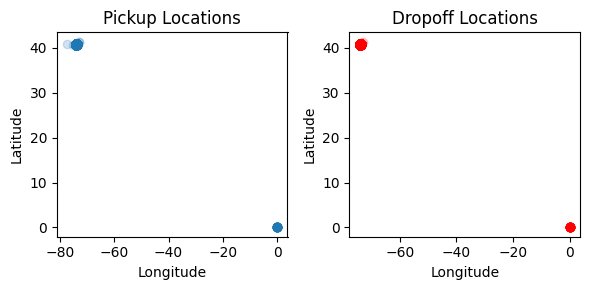

In [ ]:
import matplotlib.pyplot as plt

# Take a sample of 2000 rows for faster rendering
df_sample = df.sample(2000, random_state=42)

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Scatter plot for Pickup Locations
axes[0].scatter(df_sample['pickup_longitude'], df_sample['pickup_latitude'], alpha=0.2)
axes[0].set_title('Pickup Locations')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')

# Scatter plot for Dropoff Locations
axes[1].scatter(df_sample['dropoff_longitude'], df_sample['dropoff_latitude'], color='red', alpha=0.2)
axes[1].set_title('Dropoff Locations')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')

plt.tight_layout()
plt.show()

There seems to be a lot of erroneous values where pickup and dropoff GPS values are incorrect.

#### Analyzing the location data (is_within_new_york_box, is_pickup_jfk...)

Percentage of sample remaining after removing non-new york box location: 98.05%


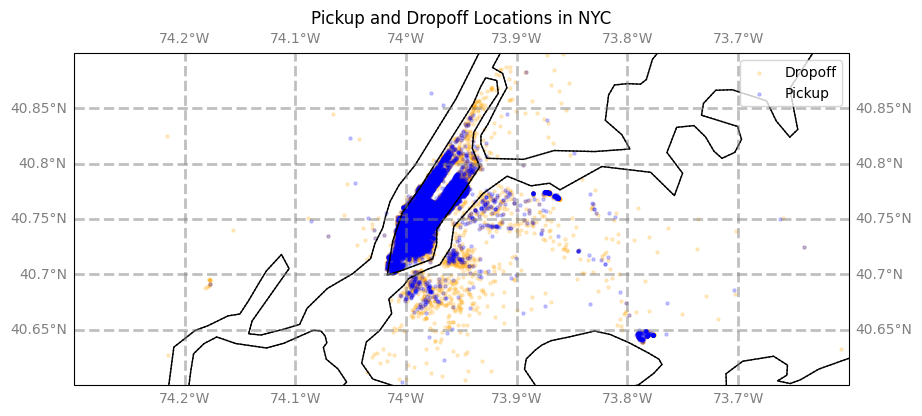

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

# Take a sample of 10000 rows for faster rendering
df_sample = df.sample(10000, random_state=0)

NEW_YORK_MIN_LATITUDE = 40.6
NEW_YORK_MAX_LATITUDE = 40.9
NEW_YORK_MIN_LONGITUDE = -74.3
NEW_YORK_MAX_LONGITUDE = -73.6

# Define the extent of the map
extent = [NEW_YORK_MIN_LONGITUDE, NEW_YORK_MAX_LONGITUDE, NEW_YORK_MIN_LATITUDE, NEW_YORK_MAX_LATITUDE]

# function to determine new york box
def is_within_new_york_box(latitude, longitude):
    """
    Checks if a given latitude and longitude are within a broader New York City box.

    Args:
        latitude (float): The latitude of the location.
        longitude (float): The longitude of the location.

    Returns:
        bool: True if the location is within the specified box, False otherwise.
    """

    # Check if the latitude and longitude are within the boundaries
    if NEW_YORK_MIN_LATITUDE <= latitude <= NEW_YORK_MAX_LATITUDE and NEW_YORK_MIN_LONGITUDE <= longitude <= NEW_YORK_MAX_LONGITUDE:
        return True
    else:
        return False

# filter to be within new york box
df_filtered = df_sample[df_sample.apply(lambda row: is_within_new_york_box(row['pickup_latitude'], row['pickup_longitude']), axis=1)]

# print the % of df_sample remaining from df_filtered
print(f"Percentage of sample remaining after removing non-new york box location: {len(df_filtered) / len(df_sample) * 100:.2f}%")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent(extent)

# Add coastline and borders for context
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')

# Add scatter plot of dropoff locations (red)
ax.scatter(df_filtered['dropoff_longitude'], df_filtered['dropoff_latitude'], color='orange', s=5, label='Dropoff',
           transform=ccrs.Geodetic(), alpha=0.2)

# Add scatter plot of pickup locations (blue)
ax.scatter(df_filtered['pickup_longitude'], df_filtered['pickup_latitude'], color='blue', s=5, label='Pickup',
           transform=ccrs.Geodetic(), alpha=0.2)

# Add gridlines and labels for latitude and longitude
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'gray'}
gl.ylabel_style = {'size': 10, 'color': 'gray'}

# Add title and legend
plt.title('Pickup and Dropoff Locations in NYC')
plt.legend()

plt.show()

Based on this data, we observe that there are multiple areas to note in general:
* Manhattan island
* Brooklyn / queens
* Airport trips
  * Laguardia
  * Newark (more drop-offs here than pick-ups)
  * JFK

In [ ]:
# Define global variables for airport coordinates
JFK_MIN_LATITUDE = 40.62487178536177
JFK_MAX_LATITUDE = 40.668374150184825
JFK_MIN_LONGITUDE = -73.82836783561552
JFK_MAX_LONGITUDE = -73.76004660716335

LGA_MIN_LATITUDE = 40.76985604230695
LGA_MAX_LATITUDE = 40.780320685488434
LGA_MIN_LONGITUDE = -73.88956511650778
LGA_MAX_LONGITUDE = -73.86261428015855

EWR_MIN_LATITUDE = 40.686974518117836
EWR_MAX_LATITUDE = 40.69696414995584
EWR_MIN_LONGITUDE = -74.18488594917685
EWR_MAX_LONGITUDE = -74.17557331941923


def is_location_in_jfk_airport(latitude, longitude):
    """
    Checks if a given latitude and longitude are within the JFK airport rectangle.
    """
    if JFK_MIN_LATITUDE <= latitude <= JFK_MAX_LATITUDE and JFK_MIN_LONGITUDE <= longitude <= JFK_MAX_LONGITUDE:
        return True
    else:
        return False

def is_location_in_lga_airport(latitude, longitude):
    """
    Checks if a given latitude and longitude are within the LGA airport rectangle.
    """
    if LGA_MIN_LATITUDE <= latitude <= LGA_MAX_LATITUDE and LGA_MIN_LONGITUDE <= longitude <= LGA_MAX_LONGITUDE:
        return True
    else:
        return False

def is_location_in_ewr_airport(latitude, longitude):
    """
    Checks if a given latitude and longitude are within the EWR airport rectangle.
    """
    if EWR_MIN_LATITUDE <= latitude <= EWR_MAX_LATITUDE and EWR_MIN_LONGITUDE <= longitude <= EWR_MAX_LONGITUDE:
        return True
    else:
        return False


# Create categorical variables for airport pickups and dropoffs
df['is_pickup_jfk'] = df.apply(lambda row: is_location_in_jfk_airport(row['pickup_latitude'], row['pickup_longitude']), axis=1).astype(int)
df['is_dropoff_jfk'] = df.apply(lambda row: is_location_in_jfk_airport(row['dropoff_latitude'], row['dropoff_longitude']), axis=1).astype(int)

df['is_pickup_lga'] = df.apply(lambda row: is_location_in_lga_airport(row['pickup_latitude'], row['pickup_longitude']), axis=1).astype(int)
df['is_dropoff_lga'] = df.apply(lambda row: is_location_in_lga_airport(row['dropoff_latitude'], row['dropoff_longitude']), axis=1).astype(int)

df['is_pickup_ewr'] = df.apply(lambda row: is_location_in_ewr_airport(row['pickup_latitude'], row['pickup_longitude']), axis=1).astype(int)
df['is_dropoff_ewr'] = df.apply(lambda row: is_location_in_ewr_airport(row['dropoff_latitude'], row['dropoff_longitude']), axis=1).astype(int)

# Display value counts for the new columns
airport_cols = ['is_pickup_jfk', 'is_dropoff_jfk', 'is_pickup_lga', 'is_dropoff_lga', 'is_pickup_ewr', 'is_dropoff_ewr']
for col in airport_cols:
    print(f"Value counts for {col}:")
    display(df[col].value_counts(normalize=True).round(3) * 100)
    print("-" * 20)

Value counts for is_pickup_jfk:


,proportion
is_pickup_jfk,
0,98.5
1,1.5


--------------------
Value counts for is_dropoff_jfk:


,proportion
is_dropoff_jfk,
0,99.2
1,0.8


--------------------
Value counts for is_pickup_lga:


,proportion
is_pickup_lga,
0,98.5
1,1.5


--------------------
Value counts for is_dropoff_lga:


,proportion
is_dropoff_lga,
0,99.1
1,0.9


--------------------
Value counts for is_pickup_ewr:


,proportion
is_pickup_ewr,
0,100.0
1,0.0


--------------------
Value counts for is_dropoff_ewr:


,proportion
is_dropoff_ewr,
0,99.9
1,0.1


--------------------


#### Analyzing the fare amount (is_fare_zero_or_negative, is_fare_excessive)

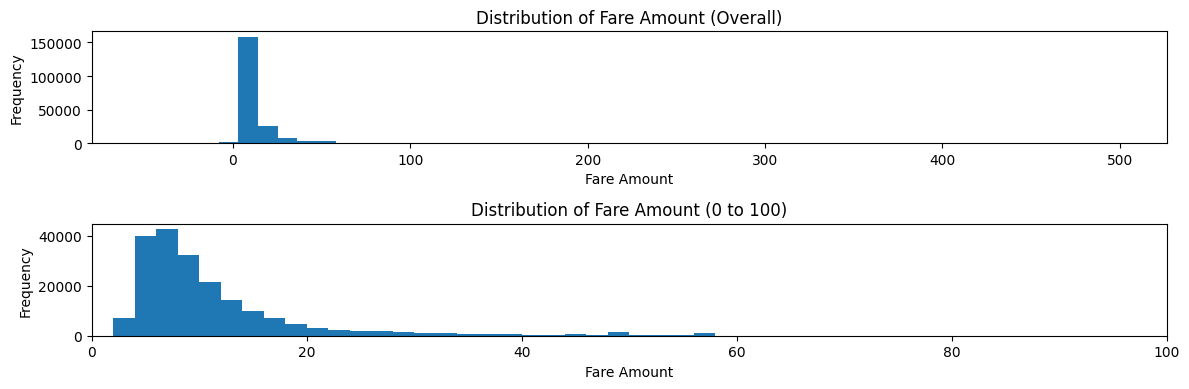

,fare_amount
count,200000.000000
mean,11.359955
std,9.901776
min,-52.000000
25%,6.000000
50%,8.500000
75%,12.500000
max,499.000000


In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 4))

# First histogram for the overall distribution
axes[0].hist(df['fare_amount'], bins=50)
axes[0].set_title('Distribution of Fare Amount (Overall)')
axes[0].set_xlabel('Fare Amount')
axes[0].set_ylabel('Frequency')

# Second histogram for the distribution between 0 and 100
axes[1].hist(df['fare_amount'], bins=50, range=(0, 100))
axes[1].set_title('Distribution of Fare Amount (0 to 100)')
axes[1].set_xlabel('Fare Amount')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0, 100) # Limit x-axis

plt.tight_layout()
plt.show()

# Display summary statistics of fare_amount
display(df['fare_amount'].describe())

Most of the fares are distributed between 0 and $60. There are some negative values which may be errors. We will assume that these are error values and remove them later.

In [ ]:
# Count the number of rows where fare_amount is 0
zero_fare_count = (df['fare_amount'] == 0).sum()

print(f"Number of rows where fare_amount is 0: {zero_fare_count}")

Number of rows where fare_amount is 0: 5


In [ ]:
# Add a column to indicate if fare_amount is excessive (>= 60)
df['is_fare_excessive'] = (df['fare_amount'] >= 60).astype(int)
display(df['is_fare_excessive'].value_counts(normalize=True).round(3) * 100)

,proportion
is_fare_excessive,
0,99.7
1,0.3


In [ ]:
# Add a column to indicate if fare_amount is zero or negative
df['is_fare_zero_or_negative'] = (df['fare_amount'] <= 0).astype(int)
display(df['is_fare_zero_or_negative'].value_counts(normalize=True).round(3) * 100)

,proportion
is_fare_zero_or_negative,
0,100.0
1,0.0


#### Creating the haversine distance formula (distance, is_reasonable_distance)

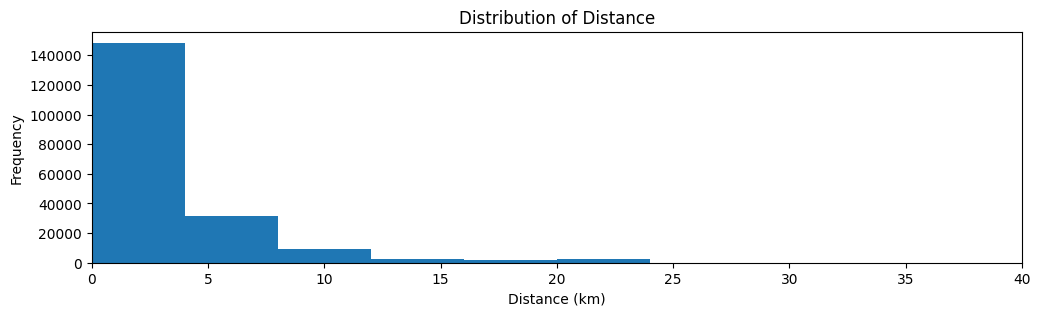

,distance
count,196031.000000
mean,4.773455
std,94.109955
min,0.000000
25%,1.255519
50%,2.156634
75%,3.910220
max,16409.239135


In [ ]:
# add column for distance between pickup and dropoff

import numpy as np
import matplotlib.pyplot as plt

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c
    return distance

# Apply the function to calculate distance for each row
df['distance'] = df.apply(lambda row: haversine_distance(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# Set distance to null if any of the pickup or dropoff coordinates are zero
df.loc[(df['pickup_longitude'] == 0) | (df['pickup_latitude'] == 0) |
       (df['dropoff_longitude'] == 0) | (df['dropoff_latitude'] == 0), 'distance'] = None

# Display a histogram of the distances
plt.figure(figsize=(12, 3))
plt.hist(df['distance'].dropna(), bins=10, range=(0, 40)) # Drop NA values for the histogram
plt.title('Distribution of Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.xlim(0, 40) # Limit x-axis
plt.show()

# Display summary statistics of distance
display(df['distance'].describe())

In [ ]:
# Create a column to indicate if distance is less than 25 km or >= 0.1 km
df['is_reasonable_distance'] = ((df['distance'] < 25) & (df['distance'] >= 0.1)).astype(int)

display(df['is_reasonable_distance'].value_counts(normalize=True).round(3) * 100)

,proportion
is_reasonable_distance,
1,96.3
0,3.7


#### Analyzing the fare amount by airport location

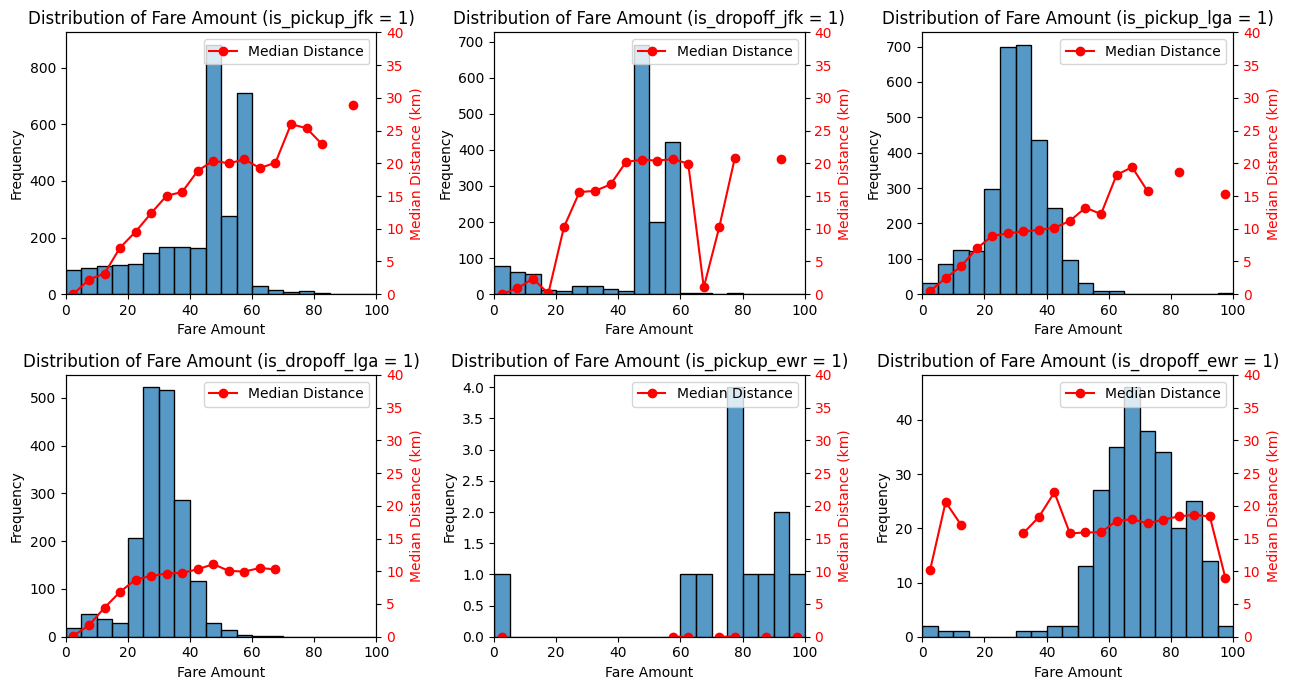

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

airport_cols = ['is_pickup_jfk', 'is_dropoff_jfk', 'is_pickup_lga', 'is_dropoff_lga', 'is_pickup_ewr', 'is_dropoff_ewr']

# Create a figure and axes for the subplots
fig, axes = plt.subplots(2, 3, figsize=(13, 7))
axes = axes.flatten() # Flatten the 2x3 array of axes to easily iterate

# Define fare amount bins
fare_bins = np.linspace(0, 100, 21) # 20 bins between 0 and 100

for i, col in enumerate(airport_cols):
    # Filter the DataFrame for rows where the current airport column is 1
    df_filtered = df[df[col] == 1].copy() # Create a copy to avoid SettingWithCopyWarning

    # Create a histogram for the filtered data (fare_amount between 0 and 100)
    sns.histplot(df_filtered['fare_amount'], bins=fare_bins, ax=axes[i], binrange=(0, 100))
    axes[i].set_title(f'Distribution of Fare Amount ({col} = 1)')
    axes[i].set_xlabel('Fare Amount')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlim(0, 100) # Limit x-axis

    # Bin the fare amount and calculate median distance per bin
    df_filtered['fare_bin'] = pd.cut(df_filtered['fare_amount'], bins=fare_bins)
    median_distance_per_fare_bin = df_filtered.groupby('fare_bin', observed=False)['distance'].median().reset_index() # Added observed=False


    # Calculate the center of each bin for plotting
    median_distance_per_fare_bin['bin_center'] = median_distance_per_fare_bin['fare_bin'].apply(lambda x: x.mid if x is not None else None)

    # Create a secondary axes for the median distance line chart
    ax2 = axes[i].twinx()

    # Plot the median distance per fare bin on the secondary axes
    line, = ax2.plot(median_distance_per_fare_bin['bin_center'], median_distance_per_fare_bin['distance'], color='red', marker='o', linestyle='-', label='Median Distance') # Added label
    ax2.set_ylabel('Median Distance (km)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(0, 40) # Limit secondary y-axis

    # Add legend to the secondary axis
    ax2.legend(handles=[line], loc='upper right') # Pass handles to the legend


plt.tight_layout()
plt.show()

There seems to be a huge spike for JFK pickups that may be hard to run a regression on. EWR also has very little pickups and the distance covered is little (seems like a data issue), but dropoffs to EWR seem correct.

#### Analyzing the fare amounts and whether they change over the years (on_or_after_20120904)

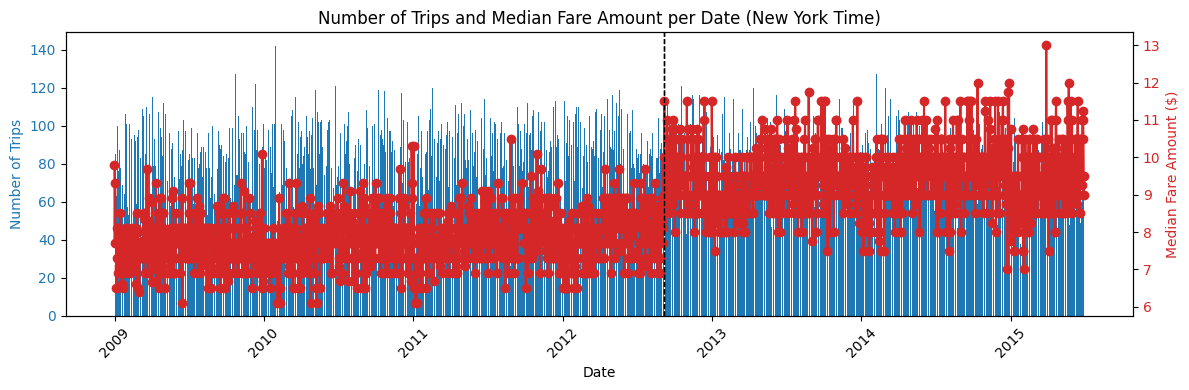

,pickup_date,row_count,median_fare_amount
1340,2012-09-01,84,8.3
1341,2012-09-02,65,7.7
1342,2012-09-03,65,8.1
1343,2012-09-04,89,10.0
1344,2012-09-05,103,9.0
1345,2012-09-06,87,11.5
1346,2012-09-07,101,8.5


In [ ]:
import matplotlib.pyplot as plt
import pytz # Keep import as pytz might be used elsewhere or good practice
import pandas as pd # Import pandas

# Create a copy of the DataFrame
df_copy = df.copy()

# Ensure pickup_datetime_ny is in datetime format with timezone
df_copy['pickup_datetime_ny'] = pd.to_datetime(df_copy['pickup_datetime_ny'])

# Extract the date and day of the week (Monday=0, Sunday=6) from the NY timezone column
df_copy['pickup_date'] = df_copy['pickup_datetime_ny'].dt.date
df_copy['day_of_week'] = df_copy['pickup_datetime_ny'].dt.dayofweek

# Calculate daily stats (row count and median fare amount)
daily_stats = df_copy.groupby('pickup_date').agg(
    row_count=('index', 'size'),
    median_fare_amount=('fare_amount', 'median')
).reset_index()

# Create a categorical column for the date period (this was used for heatmap and might not be needed here, keeping for now)
date_threshold = pd.to_datetime('2012-09-04').date()
df_copy['date_period'] = df_copy['pickup_date'].apply(lambda x: 'Before 4 Sep 2012' if x < date_threshold else 'On or After 4 Sep 2012')

# Add a vertical black line at September 4, 2012 to the previous plot
# Recreate the previous plot with the new vertical line
fig, ax1 = plt.subplots(figsize=(12, 4))

# Plot the row count bar chart on the primary axes
ax1.bar(daily_stats['pickup_date'], daily_stats['row_count'], color='tab:blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Trips', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('Number of Trips and Median Fare Amount per Date (New York Time)')
ax1.tick_params(axis='x', rotation=45)

# Create a secondary axes for the median fare amount line chart
ax2 = ax1.twinx()

# Plot the median fare amount line chart with markers on the secondary axes
ax2.plot(daily_stats['pickup_date'], daily_stats['median_fare_amount'], color='tab:red', marker='o', linestyle='-')
ax2.set_ylabel('Median Fare Amount ($)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add a vertical black line at September 4, 2012
date_to_mark = pd.to_datetime('2012-09-04').date()
ax1.axvline(date_to_mark, color='black', linestyle='--', linewidth=1)
ax2.axvline(date_to_mark, color='black', linestyle='--', linewidth=1)

# Adjust layout to prevent labels overlapping
plt.tight_layout()
plt.show()

# Drop the temporary 'pickup_date', 'day_of_week', and 'date_period' columns from the copy if they were created in this cell
# Note: Only drop if created within this cell and not needed later
# df_copy = df_copy.drop(columns=['pickup_date', 'day_of_week', 'date_period'])

# Filter daily_stats for the specified date range
start_date = '2012-09-01'
end_date = '2012-09-07'
median_fare_narrow = daily_stats[(daily_stats['pickup_date'] >= pd.to_datetime(start_date).date()) &
                                        (daily_stats['pickup_date'] <= pd.to_datetime(end_date).date())]

# Display the table
display(median_fare_narrow)

There is a noticeable jump in the median fare amount on 4 Sep 2012. Most likely a price hike.

In [ ]:
import pandas as pd

# Define the date threshold
date_threshold = pd.to_datetime('2012-09-04').date()

# Create the new column based on the date in pickup_datetime_ny
df['on_or_after_20120904'] = (df['pickup_datetime_ny'].dt.date >= date_threshold).astype(int)

print("Absolute Counts:")
display(df['on_or_after_20120904'].value_counts())
print("\nPercentages:")
display(df['on_or_after_20120904'].value_counts(normalize=True).round(2)) # Display percentages

Absolute Counts:


,count
on_or_after_20120904,
0,114644
1,85356



Percentages:


,proportion
on_or_after_20120904,
0,0.57
1,0.43


#### Analyzing fixed fares (is_assumed_fixed_fare)

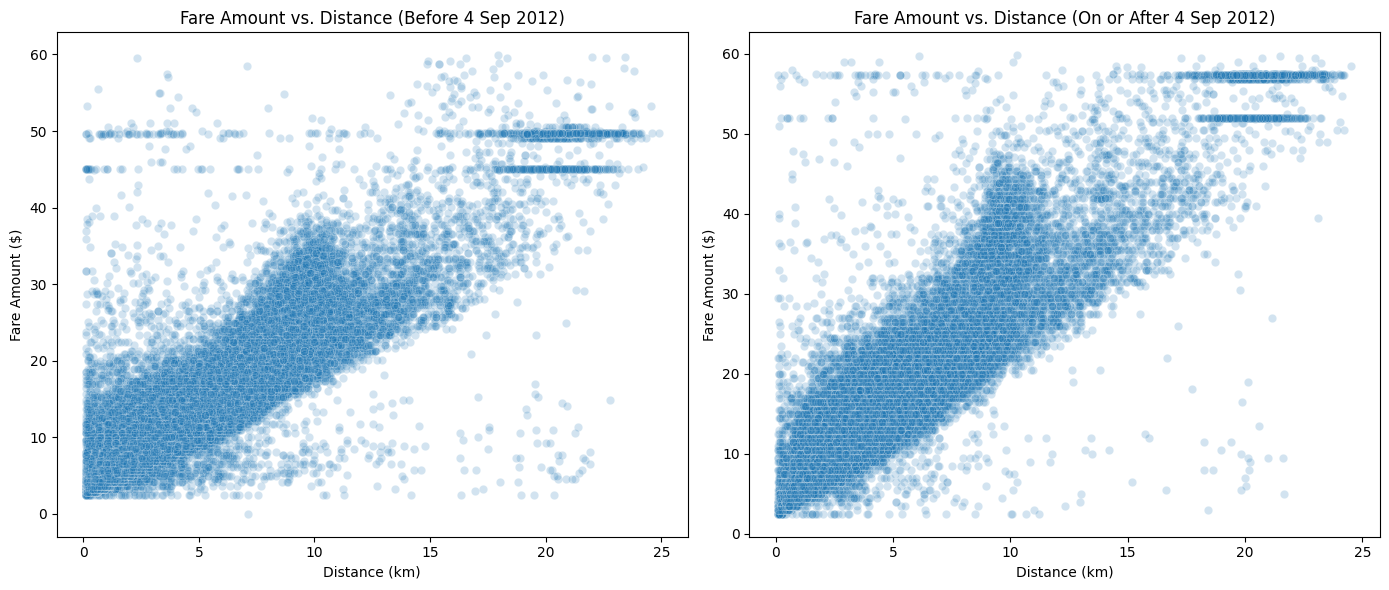

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_copy = df.copy()

# filter out is_zero_or_negative and is_fare_excessive
df_copy = df_copy[(df_copy['is_fare_zero_or_negative'] == 0) & (df_copy['is_fare_excessive'] == 0)]

# filter for is_reasonable_distance
df_copy = df_copy[df_copy['is_reasonable_distance'] == 1]

# Create two subplots based on on_or_after_20120904
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Filter data for before 4 Sep 2012
df_before = df_copy[df_copy['on_or_after_20120904'] == 0]

# Scatter plot for data before 4 Sep 2012
sns.scatterplot(x='distance', y='fare_amount', data=df_before, ax=axes[0], alpha=0.2)
axes[0].set_title('Fare Amount vs. Distance (Before 4 Sep 2012)')
axes[0].set_xlabel('Distance (km)')
axes[0].set_ylabel('Fare Amount ($)')

# Filter data for on or after 4 Sep 2012
df_after = df_copy[df_copy['on_or_after_20120904'] == 1]

# Scatter plot for data on or after 4 Sep 2012
sns.scatterplot(x='distance', y='fare_amount', data=df_after, ax=axes[1], alpha=0.2)
axes[1].set_title('Fare Amount vs. Distance (On or After 4 Sep 2012)')
axes[1].set_xlabel('Distance (km)')
axes[1].set_ylabel('Fare Amount ($)')


plt.tight_layout()
plt.show()

There seems to be some fixed fares at certain tiers around $45 to 60 mark

In [ ]:
# Filter for fare amounts between 45 and 60
fares_45_to_60 = df[(df['fare_amount'] >= 45) & (df['fare_amount'] <= 60)]

# Get the value counts, sorted by frequency (default)
fare_counts = fares_45_to_60['fare_amount'].value_counts()

# Display the top 10 most frequent fares in this range
print("Top 10 Most Frequent Fare Amounts Between $45 and $60:")
display(fare_counts.head(15))

# get the fare_amount where fare_counts > 100 and put them in a list
fixed_fares = fare_counts[fare_counts > 100].index.tolist()

display(fixed_fares)

# Assuming 'fixed_fares' list is available from a previous cell
# Create a column to indicate if the fare amount is in the fixed_fares list
df['is_assumed_fixed_fare'] = df['fare_amount'].apply(lambda x: 1 if x in fixed_fares else 0)

display(df['is_assumed_fixed_fare'].value_counts(normalize=True).round(3) * 100)

Top 10 Most Frequent Fare Amounts Between $45 and $60:


,count
fare_amount,
57.33,851
49.80,654
45.00,521
52.00,410
49.57,391
56.80,183
49.15,133
57.54,125
50.50,50


[57.33, 49.8, 45.0, 52.0, 49.57, 56.8, 49.15, 57.54]

,proportion
is_assumed_fixed_fare,
0,98.4
1,1.6


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


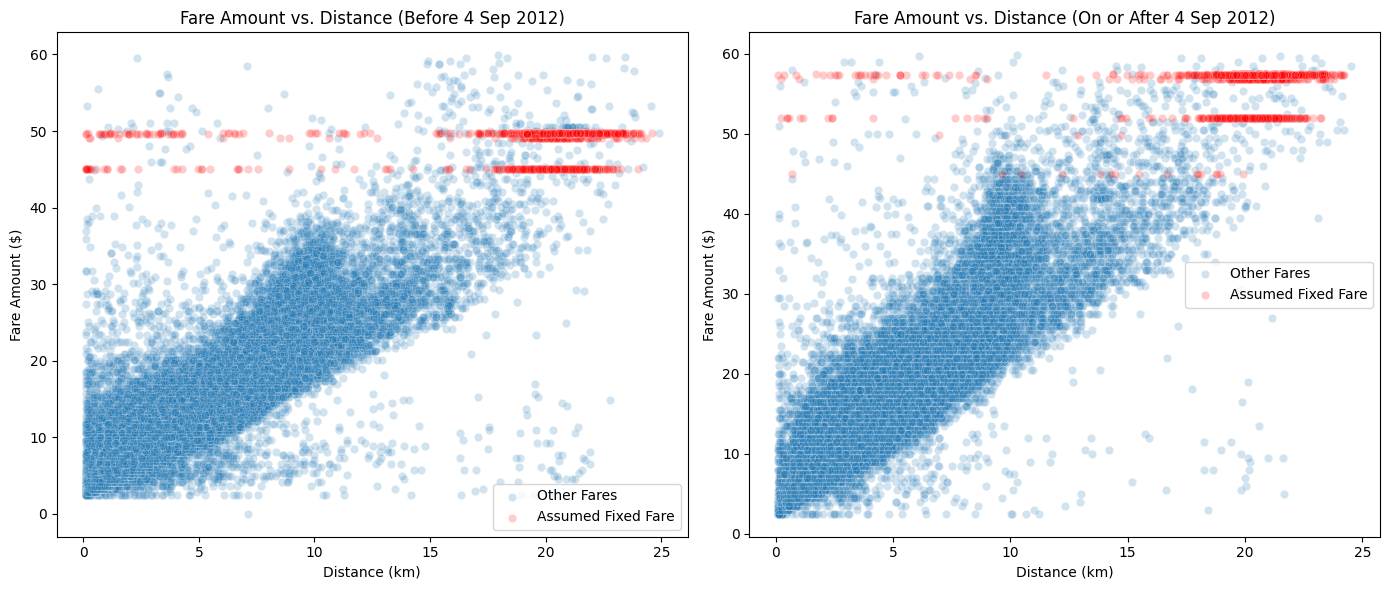

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_copy = df.copy()

# filter out is_zero_or_negative and is_fare_excessive
df_copy = df_copy[(df_copy['is_fare_zero_or_negative'] == 0) & (df_copy['is_fare_excessive'] == 0)]

# filter for is_reasonable_distance
df_copy = df_copy[df_copy['is_reasonable_distance'] == 1]

# Create two subplots based on on_or_after_20120904
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Filter data for before 4 Sep 2012
df_before = df_copy[df_copy['on_or_after_20120904'] == 0]

# Filter fixed fares for before 4 Sep 2012
df_before_fixed = df_before[df_before['is_assumed_fixed_fare'] == 1]
df_before_not_fixed = df_before[df_before['is_assumed_fixed_fare'] == 0]

# Scatter plot for data before 4 Sep 2012 (non-fixed fares in blue)
sns.scatterplot(x='distance', y='fare_amount', data=df_before_not_fixed, ax=axes[0], alpha=0.2, label='Other Fares')
# Scatter plot for data before 4 Sep 2012 (fixed fares in red)
sns.scatterplot(x='distance', y='fare_amount', data=df_before_fixed, ax=axes[0], alpha=0.2, color='red', label='Assumed Fixed Fare')

axes[0].set_title('Fare Amount vs. Distance (Before 4 Sep 2012)')
axes[0].set_xlabel('Distance (km)')
axes[0].set_ylabel('Fare Amount ($)')
axes[0].legend()

# Filter data for on or after 4 Sep 2012
df_after = df_copy[df_copy['on_or_after_20120904'] == 1]

# Filter fixed fares for on or after 4 Sep 2012
df_after_fixed = df_after[df_after['is_assumed_fixed_fare'] == 1]
df_after_not_fixed = df_after[df_after['is_assumed_fixed_fare'] == 0]

# Scatter plot for data on or after 4 Sep 2012 (non-fixed fares in blue)
sns.scatterplot(x='distance', y='fare_amount', data=df_after_not_fixed, ax=axes[1], alpha=0.2, label='Other Fares')
# Scatter plot for data on or after 4 Sep 2012 (fixed fares in red)
sns.scatterplot(x='distance', y='fare_amount', data=df_after_fixed, ax=axes[1], alpha=0.2, color='red', label='Assumed Fixed Fare')

axes[1].set_title('Fare Amount vs. Distance (On or After 4 Sep 2012)')
axes[1].set_xlabel('Distance (km)')
axes[1].set_ylabel('Fare Amount ($)')
axes[1].legend()

plt.tight_layout()
plt.show()

Notice that the relationship is mostly linear but curves up. I assume this is because the longer you go the distance, the more likely you will end up in a traffic jam, which causes the fare to increase due to more time. Unfortunately, we do not have the data when the customer alights the Uber, so we cannot factor this into our model. At best, we know from real-life that there are day of week patterns which we can work into our model to approximate traffic situations.

#### Analyzing day-of-week and hourly performance (add_features_dow / dowhour)

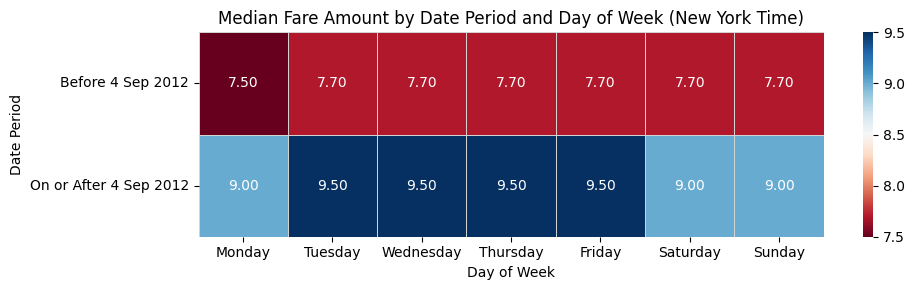

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Create a copy of the DataFrame
df_copy = df.copy()

# filter out fixed fares and reasonable distances
df_copy = df_copy[(df_copy['is_assumed_fixed_fare'] == 0) & (df_copy['is_reasonable_distance'] == 1)]

# Ensure pickup_datetime is in datetime format and New York time zone
df_copy['pickup_datetime'] = pd.to_datetime(df_copy['pickup_datetime'], utc=True)
ny_timezone = pytz.timezone('America/New_York')
df_copy['pickup_datetime'] = df_copy['pickup_datetime'].dt.tz_convert(ny_timezone)

# Extract the date and day of the week (Monday=0, Sunday=6)
df_copy['pickup_date'] = df_copy['pickup_datetime'].dt.date
df_copy['day_of_week'] = df_copy['pickup_datetime'].dt.dayofweek

# Create a categorical column for the date period
date_threshold = pd.to_datetime('2012-09-04').date()
df_copy['date_period'] = df_copy['pickup_date'].apply(lambda x: 'Before 4 Sep 2012' if x < date_threshold else 'On or After 4 Sep 2012')

# Calculate median fare amount for each date period and day of the week
heatmap_data = df_copy.groupby(['date_period', 'day_of_week'])['fare_amount'].median().unstack()

# Reorder columns to represent days of the week correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data.columns = pd.CategoricalIndex(heatmap_data.columns, categories=np.arange(7), ordered=True)
heatmap_data = heatmap_data.sort_index(axis=1)
heatmap_data.columns = day_order # Set column names to day names

# Define a standard continuous colormap
plt.figure(figsize=(10, 3))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='RdBu', linewidths=.5, linecolor='lightgray')
plt.title('Median Fare Amount by Date Period and Day of Week (New York Time)')
plt.xlabel('Day of Week')
plt.ylabel('Date Period')
plt.yticks(rotation=0) # Ensure y-axis labels are horizontal
plt.tight_layout()
plt.show()

# Drop the temporary columns from the copy
df_copy = df_copy.drop(columns=['pickup_date', 'day_of_week', 'date_period'])

Seems like there might be some variation in day of week.

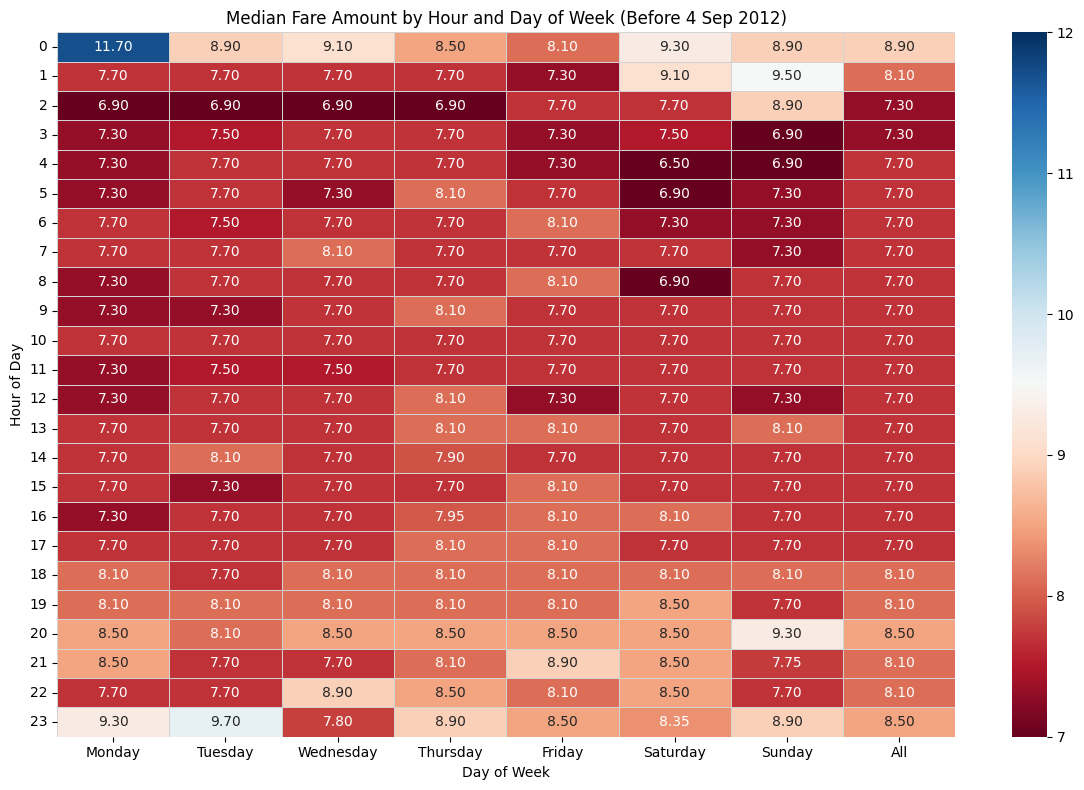

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Create a copy of the DataFrame
df_copy = df.copy()

# filter out fixed fares and reasonable distances
df_filtered = df_copy[(df_copy['is_assumed_fixed_fare'] == 0) & (df_copy['is_reasonable_distance'] == 1)]

# Filter data using the existing 'on_or_after_20120904' column for dates *before* 4 Sep 2012
df_filtered = df_copy[df_copy['on_or_after_20120904'] == 0].copy()

# Ensure pickup_datetime_ny is in datetime format (already done but good practice)
df_filtered['pickup_datetime_ny'] = pd.to_datetime(df_filtered['pickup_datetime_ny'])

# Extract hour of the day and day of the week
df_filtered['pickup_hour'] = df_filtered['pickup_datetime_ny'].dt.hour
df_filtered['day_of_week'] = df_filtered['pickup_datetime_ny'].dt.dayofweek

# Calculate median fare amount for each hour and day of the week
heatmap_data = df_filtered.groupby(['pickup_hour', 'day_of_week'])['fare_amount'].median().unstack()

# Calculate median fare amount for each hour across all days
median_fare_all_days = df_filtered.groupby('pickup_hour')['fare_amount'].median()

# Reorder columns to represent days of the week correctly and add 'All' column
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_name_mapping = {i: day for i, day in enumerate(day_order)}
heatmap_data = heatmap_data.rename(columns=day_name_mapping)
heatmap_data['All'] = median_fare_all_days

# Ensure the column order including 'All'
full_day_order = day_order + ['All']
heatmap_data = heatmap_data.reindex(columns=full_day_order)

# Define a standard continuous colormap
plt.figure(figsize=(12, 8)) # Adjusted figure size to accommodate the extra column
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='RdBu', linewidths=.5, linecolor='lightgray', vmin=7, vmax=12) # Set vmin and vmax
plt.title('Median Fare Amount by Hour and Day of Week (Before 4 Sep 2012)') # Updated title
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.yticks(rotation=0) # Ensure y-axis labels are horizontal
plt.tight_layout()
plt.show()

# Drop the temporary columns from the filtered copy
df_filtered = df_filtered.drop(columns=['pickup_hour', 'day_of_week'])

A summary of the patterns before 4 Sep 2012 shows that the pattern is distinct from the pattern after 4 Sep 2012. Perhaps this is a pricing change done by Uber. This may mean that the historic data might not be so good moving forward.

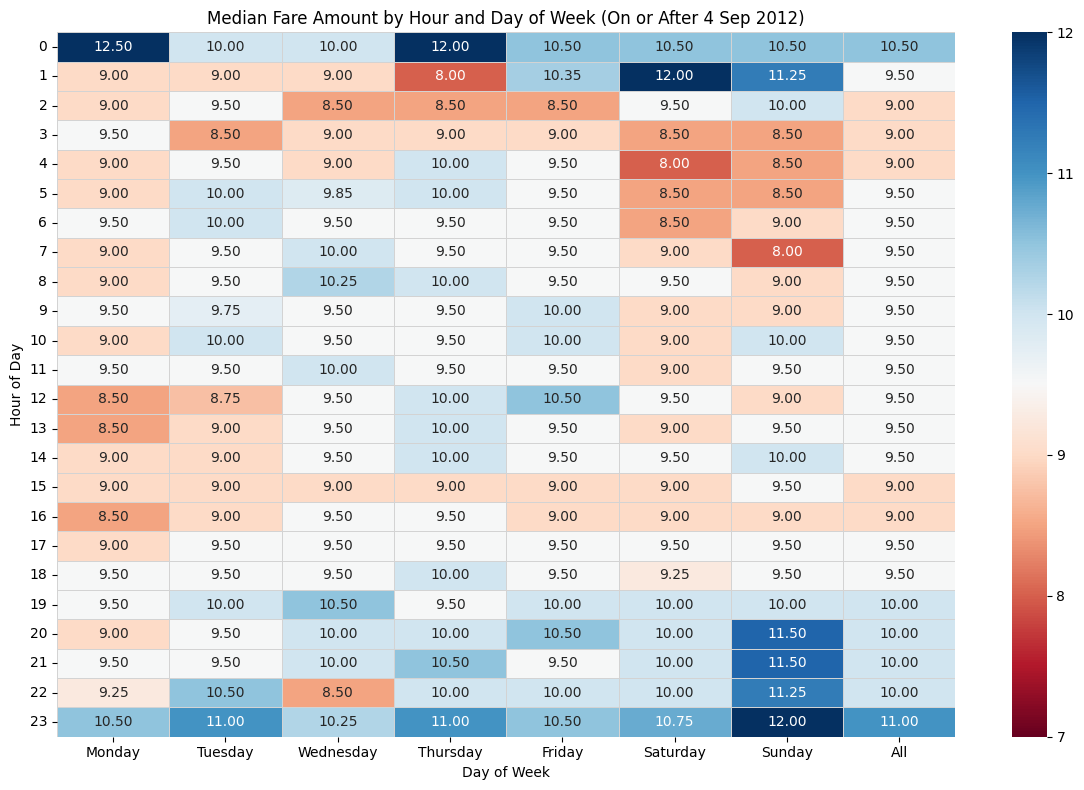

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Create a copy of the DataFrame
df_copy = df.copy()

# filter out fixed fares and reasonable distances
df_filtered = df_copy[(df_copy['is_assumed_fixed_fare'] == 0) & (df_copy['is_reasonable_distance'] == 1)]

# Filter data using the existing 'on_or_after_20120904' column
df_filtered = df_copy[df_copy['on_or_after_20120904'] == 1].copy()

# Ensure pickup_datetime_ny is in datetime format (already done but good practice)
df_filtered['pickup_datetime_ny'] = pd.to_datetime(df_filtered['pickup_datetime_ny'])

# Extract hour of the day and day of the week
df_filtered['pickup_hour'] = df_filtered['pickup_datetime_ny'].dt.hour
df_filtered['day_of_week'] = df_filtered['pickup_datetime_ny'].dt.dayofweek

# Calculate median fare amount for each hour and day of the week
heatmap_data = df_filtered.groupby(['pickup_hour', 'day_of_week'])['fare_amount'].median().unstack()

# Calculate median fare amount for each hour across all days
median_fare_all_days = df_filtered.groupby('pickup_hour')['fare_amount'].median()

# Reorder columns to represent days of the week correctly and add 'All' column
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_name_mapping = {i: day for i, day in enumerate(day_order)}
heatmap_data = heatmap_data.rename(columns=day_name_mapping)
heatmap_data['All'] = median_fare_all_days

# Ensure the column order including 'All'
full_day_order = day_order + ['All']
heatmap_data = heatmap_data.reindex(columns=full_day_order)

# Define a standard continuous colormap
plt.figure(figsize=(12, 8)) # Adjusted figure size to accommodate the extra column
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='RdBu', linewidths=.5, linecolor='lightgray', vmin=7, vmax=12) # Set vmin and vmax
plt.title('Median Fare Amount by Hour and Day of Week (On or After 4 Sep 2012)')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.yticks(rotation=0) # Ensure y-axis labels are horizontal
plt.tight_layout()
plt.show()

# Drop the temporary columns from the filtered copy
df_filtered = df_filtered.drop(columns=['pickup_hour', 'day_of_week'])

It seems like the day of week patterns by hour are slightly different before and after 4 Sep 2012. This is a lot of columns, we can create a function to add columns such as dow_mon and dowhour_mon_00 format


In [ ]:
import pandas as pd

def add_features_dow(df):
    """
    Adds binary columns to a DataFrame indicating the day of the week for pickup_datetime_ny.

    Args:
        df (pd.DataFrame): The input DataFrame with a 'pickup_datetime_ny' column.

    Returns:
        pd.DataFrame: The DataFrame with added day of week feature columns.
    """
    df_copy = df.copy()

    # Ensure pickup_datetime_ny is in datetime format
    df_copy['pickup_datetime_ny'] = pd.to_datetime(df_copy['pickup_datetime_ny'])

    # Extract day of the week (Monday=0, Sunday=6)
    df_copy['day_of_week'] = df_copy['pickup_datetime_ny'].dt.dayofweek

    # Define day names
    day_names = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

    # Add binary columns for each day of the week (Monday to Saturday)
    for i, day in enumerate(day_names[:6]): # Iterate from Monday (0) to Saturday (5)
        col_name = f'dow_{day}'
        if col_name not in df_copy.columns:
            df_copy[col_name] = (df_copy['day_of_week'] == i).astype(int)
        else:
            print(f"Column '{col_name}' already exists and will not be overwritten.")


    # Drop the temporary 'day_of_week' column if it's not needed
    if 'day_of_week' in df_copy.columns and 'day_of_week' not in df.columns:
        df_copy = df_copy.drop(columns=['day_of_week'])


    return df_copy

display(add_features_dow(df).head(2))

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_ny,...,distance,is_reasonable_distance,on_or_after_20120904,is_assumed_fixed_fare,dow_mon,dow_tue,dow_wed,dow_thu,dow_fri,dow_sat
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 15:52:06-04:00,...,1.683323,1,1,0,0,0,0,1,0,0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 16:04:56-04:00,...,2.457590,1,0,0,0,0,0,0,1,0


In [ ]:
import pandas as pd

def add_features_dowhour(df):
    """
    Adds binary columns for each day of the week and hour combination.

    Args:
        df (pd.DataFrame): The input DataFrame with a 'pickup_datetime_ny' column.

    Returns:
        pd.DataFrame: The DataFrame with added day of week and hour feature columns.
    """
    df_copy = df.copy()

    # Ensure pickup_datetime_ny is in datetime format and extract hour and day of week
    df_copy['pickup_datetime_ny'] = pd.to_datetime(df_copy['pickup_datetime_ny'])
    df_copy['pickup_hour'] = df_copy['pickup_datetime_ny'].dt.hour
    df_copy['day_of_week'] = df_copy['pickup_datetime_ny'].dt.dayofweek # Monday=0, Sunday=6

    # Define day names
    day_names = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']

    # Create a list to store the new binary columns
    new_cols_data = {}

    # Create binary columns for each day of the week and hour combination
    # Exclude the last combination (Sunday, hour 23) to avoid multicollinearity
    for day_index, day in enumerate(day_names):
        for hour in range(24):
            # Exclude the last combination (Sunday and hour 23)
            if not (day_index == 6 and hour == 23):
                col_name = f'dowhour_{day}_{hour:02d}'
                # Check if the column already exists in the original DataFrame to avoid overwriting
                if col_name not in df.columns:
                    new_cols_data[col_name] = ((df_copy['day_of_week'] == day_index) &
                                               (df_copy['pickup_hour'] == hour)).astype(int)
                else:
                    print(f"Column '{col_name}' already exists and will not be overwritten.")

    # Create a new DataFrame from the collected binary column data
    df_new_cols = pd.DataFrame(new_cols_data, index=df_copy.index)

    # Concatenate the new columns to the original DataFrame copy
    df_copy = pd.concat([df_copy, df_new_cols], axis=1)

    # Drop the temporary 'pickup_hour' and 'day_of_week' columns if they are not needed
    if 'pickup_hour' in df_copy.columns and 'pickup_hour' not in df.columns:
        df_copy = df_copy.drop(columns=['pickup_hour'])
    if 'day_of_week' in df_copy.columns and 'day_of_week' not in df.columns:
        df_copy = df_copy.drop(columns=['day_of_week'])

    return df_copy

test_df = add_features_dowhour(df)
display(test_df.head(2))

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_ny,...,dowhour_sun_13,dowhour_sun_14,dowhour_sun_15,dowhour_sun_16,dowhour_sun_17,dowhour_sun_18,dowhour_sun_19,dowhour_sun_20,dowhour_sun_21,dowhour_sun_22
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 15:52:06-04:00,...,0,0,0,0,0,0,0,0,0,0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17 16:04:56-04:00,...,0,0,0,0,0,0,0,0,0,0



## Data Cleaning & Preprocessing
   * Handle missing values by imputation or removal.  
   * Address outliers and encoding categorical variables.  
   * Apply variable transformations (e.g., log, sqrt) if non-linear relationships or skewed distributions are present.  
   * **Scale predictors** if using regularized methods like Ridge or Lasso.

### Filter out df for scope of analysis

In [ ]:
# make a copy for cleaning and pre-processing
df_clean = df.copy()

# Get original row count of df_clean
initial_rows_clean = df_clean.shape[0]
print(f"Initial row count of df_clean: {initial_rows_clean:,}")

# Filter 1: Keep rows where fare is not zero or negative
df_clean = df_clean[df_clean['is_fare_zero_or_negative'] == 0].copy()
rows_after_filter1 = df_clean.shape[0]
percentage_lost_filter1 = ((initial_rows_clean - rows_after_filter1) / initial_rows_clean) * 100
print(f"After filtering is_fare_zero_or_negative = 0: {rows_after_filter1:,} rows ({percentage_lost_filter1:.2f}% lost)")

# Filter 2: Keep rows where pickup coords are not zero or null
df_clean = df_clean[df_clean['pickup_coord_zero_or_null'] == 0].copy()
rows_after_filter2 = df_clean.shape[0]
percentage_lost_filter2 = ((initial_rows_clean - rows_after_filter2) / initial_rows_clean) * 100
print(f"After filtering pickup_coord_zero_or_null = 0: {rows_after_filter2:,} rows ({percentage_lost_filter2:.2f}% lost)")

# Filter 3: Keep rows where dropoff coords are not zero or null
df_clean = df_clean[df_clean['dropoff_coord_zero_or_null'] == 0].copy()
rows_after_filter3 = df_clean.shape[0]
percentage_lost_filter3 = ((initial_rows_clean - rows_after_filter3) / initial_rows_clean) * 100
print(f"After filtering dropoff_coord_zero_or_null = 0: {rows_after_filter3:,} rows ({percentage_lost_filter3:.2f}% lost)")

# Filter 4: Keep rows on or after 4 Sep 2012
df_clean = df_clean[df_clean['on_or_after_20120904'] == 1].copy()
rows_after_filter4 = df_clean.shape[0]
percentage_lost_filter4 = ((initial_rows_clean - rows_after_filter4) / initial_rows_clean) * 100
print(f"After filtering on_or_after_20120904 = 1: {rows_after_filter4:,} rows ({percentage_lost_filter4:.2f}% lost)")

# Filter 5: Keep rows where pickup is not JFK, LGA, or EWR
df_clean = df_clean[(df_clean['is_pickup_jfk'] == 0) &
                    (df_clean['is_pickup_lga'] == 0) &
                    (df_clean['is_pickup_ewr'] == 0)].copy()
rows_after_filter5 = df_clean.shape[0]
percentage_lost_filter5 = ((initial_rows_clean - rows_after_filter5) / initial_rows_clean) * 100
print(f"After filtering out airport pickups: {rows_after_filter5:,} rows ({percentage_lost_filter5:.2f}% lost)")

# Filter 6: Filter for reasonable distance
df_clean = df_clean[df_clean['is_reasonable_distance'] == 1].copy()
rows_after_filter6 = df_clean.shape[0]
percentage_lost_filter6 = ((initial_rows_clean - rows_after_filter6) / initial_rows_clean) * 100
print(f"After filtering reasonable distance: {rows_after_filter6:,} rows ({percentage_lost_filter6:.2f}% lost)")

# Filter 7: Filter out excessive fares
df_clean = df_clean[df_clean['is_fare_excessive'] == 0].copy()
rows_after_filter7 = df_clean.shape[0]
percentage_lost_filter7 = ((initial_rows_clean - rows_after_filter7) / initial_rows_clean) * 100
print(f"After filtering excessive fares: {rows_after_filter7:,} rows ({percentage_lost_filter7:.2f}% lost)")

# Filter 9: Filter out assumed fixed fares
df_clean = df_clean[df_clean['is_assumed_fixed_fare'] == 0].copy()
rows_after_filter9 = df_clean.shape[0]
percentage_lost_filter9 = ((initial_rows_clean - rows_after_filter9) / initial_rows_clean) * 100
print(f"After filtering assumed fixed fares: {rows_after_filter9:,} rows ({percentage_lost_filter9:.2f}% lost)")

# Get final row count
final_rows_clean = df_clean.shape[0]
total_percentage_lost = ((initial_rows_clean - final_rows_clean) / initial_rows_clean) * 100
print(f"\nFinal row count after all filters: {final_rows_clean:,}")
print(f"Total percentage of rows lost: {total_percentage_lost:.2f}%")

display(df_clean.head())

Initial row count of df_clean: 200,000
After filtering is_fare_zero_or_negative = 0: 199,978 rows (0.01% lost)
After filtering pickup_coord_zero_or_null = 0: 196,190 rows (1.91% lost)
After filtering dropoff_coord_zero_or_null = 0: 196,012 rows (1.99% lost)
After filtering on_or_after_20120904 = 1: 83,664 rows (58.17% lost)
After filtering out airport pickups: 80,737 rows (59.63% lost)
After filtering reasonable distance: 79,732 rows (60.13% lost)
After filtering excessive fares: 79,508 rows (60.25% lost)
After filtering assumed fixed fares: 78,851 rows (60.57% lost)

Final row count after all filters: 78,851
Total percentage of rows lost: 60.57%


,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_ny,...,is_pickup_lga,is_dropoff_lga,is_pickup_ewr,is_dropoff_ewr,is_fare_excessive,is_fare_zero_or_negative,distance,is_reasonable_distance,on_or_after_20120904,is_assumed_fixed_fare
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07 15:52:06-04:00,...,0,0,0,0,0,0,1.683323,1,1,0
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28 13:47:00-04:00,...,0,0,0,0,0,0,4.475450,1,1,0
6,48725865,2014-10-12 07:04:00.0000002,24.5,2014-10-12 07:04:00+00:00,-73.961447,40.693965,-73.871195,40.774297,5,2014-10-12 03:04:00-04:00,...,0,1,0,0,0,0,11.731015,1,1,0
10,2205147,2015-05-22 17:32:27.0000004,6.5,2015-05-22 17:32:27+00:00,-73.974388,40.746952,-73.988586,40.729805,1,2015-05-22 13:32:27-04:00,...,0,0,0,0,0,0,2.250858,1,1,0
18,49173512,2015-03-25 08:58:35.0000001,12.0,2015-03-25 08:58:35+00:00,-73.962532,40.767189,-73.974457,40.753860,1,2015-03-25 04:58:35-04:00,...,0,0,0,0,0,0,1.790319,1,1,0


### Select features wanted for analysis

#### Feature engineering


In [ ]:
# create distance squared
df_clean['distance_squared'] = df_clean['distance'] ** 2

# dow
df_clean = add_features_dow(df_clean)

# this is needed for train test split by time
ser_date = df_clean['pickup_datetime_ny']

#### Select columns for analysis

In [ ]:
import pandas as pd

# Assuming df_clean is available and contains all the necessary columns
# Define the list of base columns
y_col = ['fare_amount']

x_base_cols = ['distance']

# Define the list of engineered distance features
# Assuming 'distance_squared' has been created and added to df_clean
engineered_cols = ['distance_squared']

# Define the list of dow columns
dow_cols = ['dow_mon', 'dow_tue', 'dow_wed', 'dow_thu', 'dow_fri', 'dow_sat']

# Define the list of airport columns (assuming these exist in df_clean)
airport_cols = ['is_dropoff_lga', 'is_dropoff_jfk', 'is_dropoff_ewr']

# Combine all the lists of column names, excluding the target variable for scaling
feature_cols = [col for col in x_base_cols + engineered_cols + dow_cols + airport_cols]
all_selected_cols = y_col + feature_cols # Include target variable in the final selection list

# Filter out columns that might not exist in df_clean
existing_cols = [col for col in all_selected_cols if col in df_clean.columns]
if len(existing_cols) != len(all_selected_cols):
    print("Warning: Some requested columns were not found in df_clean and will be excluded from df_select.")
    print(f"Missing columns: {list(set(all_selected_cols) - set(existing_cols))}")

# Select the desired columns to create df_select
df_select = df_clean[existing_cols].copy()

# Separate features (X) and target (y) for scaling
X = df_select.drop(columns=y_col)
y = df_select[y_col[0]]

print('X')
display(X.head(2))
print('y')
display(y.head(2))

X


,distance,distance_squared,dow_mon,dow_tue,dow_wed,dow_thu,dow_fri,dow_sat,is_dropoff_lga,is_dropoff_jfk,is_dropoff_ewr
0,1.683323,2.833575,0,0,0,1,0,0,0,0,0
4,4.475450,20.029652,0,0,0,1,0,0,0,0,0


y


,fare_amount
0,7.5
4,16.0


#### Scale for regularization (not used right now)

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np # Import numpy for reshaping y

def scale_features_target(X, y):
    """
    Scales features (X) and the target variable (y) using StandardScaler.

    Args:
        X (pd.DataFrame): DataFrame of features to scale.
        y (pd.Series): Series of the target variable to scale.

    Returns:
        tuple: A tuple containing X_scaled (pd.DataFrame), y_scaled (pd.Series),
               X_scaler (StandardScaler object), y_scaler (StandardScaler object).
    """
    # Initialize a scaler for the features
    X_scaler = StandardScaler()

    # Fit the scaler on X and transform it
    X_scaled = X_scaler.fit_transform(X)

    # Convert the scaled features back to a DataFrame, preserving index and columns
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

    # Initialize a scaler for the target variable
    y_scaler = StandardScaler()

    # Reshape y to be a 2D array as required by StandardScaler
    y_reshaped = y.values.reshape(-1, 1)

    # Fit the scaler on y and transform it
    y_scaled = y_scaler.fit_transform(y_reshaped)

    # Convert the scaled y back to a Series, preserving index and name
    y_scaled_series = pd.Series(y_scaled.flatten(), index=y.index, name=y.name + '_scaled')

    print("Features and target scaled successfully.")

    return X_scaled_df, y_scaled_series, X_scaler, y_scaler

# Example usage (assuming X and y are available from previous cells):
# X_scaled_df, y_scaled_series, X_scaler, y_scaler = scale_features_target(X, y)

# print("Original Features (X) head:")
# display(X.head(2))
# print("\nScaled Features (X_scaled_df) head:")
# display(X_scaled_df.head(2))

# print("\nOriginal Target (y) head:")
# display(y.head(2))
# print("\nScaled Target (y_scaled_series) head:")
# display(y_scaled_series.head(2))

Features and target scaled successfully.


#### Check correlation between independent variables

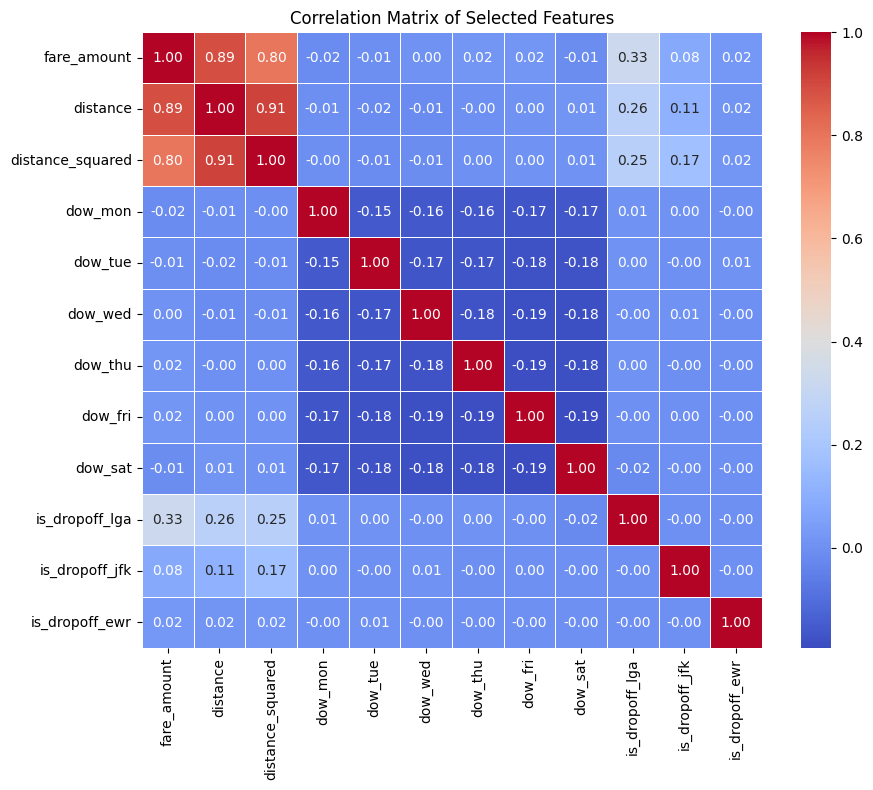

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df_select.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

Features aren't strongly correlated except for dropoff to LGA. Makes sense since LGA is very far.

# Phase 3: Model Specification & Estimation

1. **Split Data (for Prediction):**
   * Divide the dataset into a **training set** (for model building) and an **unseen test set** (for final evaluation).
2. **Specify the Model:**
   * Select the predictors to include based on theory and EDA findings.
   * Add interaction or polynomial terms if necessary, following the hierarchical principle.
3. **Estimate the Model:**
   * Fit the model to the training data using an appropriate method (e.g., Ordinary Least Squares).


## Test Multiple Models Through Feature Engineering

### Reusable functions to train test split, run regression, and test results

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # Keep this import just in case, though not strictly used in the modified function

def time_series_train_test_split(X, y, datetime_series, split_percentile=80):
    """
    Splits features (X) and target (y) into training and testing sets based on a time-based Series.

    Args:
        X (pd.DataFrame): DataFrame of features.
        y (pd.Series): Series of the target variable.
        datetime_series (pd.Series): Series containing the time-based data corresponding to X and y.
        split_percentile (int): The percentile of the time-based Series to use for splitting (e.g., 80 for 80/20 split).

    Returns:
        tuple: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Ensure the datetime_series is in datetime format
    datetime_series = pd.to_datetime(datetime_series)

    # Find the date at the specified percentile
    split_date = np.percentile(datetime_series, split_percentile)

    # Get the indices for training and testing data based on the split date
    train_indices = datetime_series[datetime_series <= split_date].index
    test_indices = datetime_series[datetime_series > split_date].index

    # Split X and y using the indices
    X_train = X.loc[train_indices].copy()
    X_test = X.loc[test_indices].copy()
    y_train = y.loc[train_indices].copy()
    y_test = y.loc[test_indices].copy()


    print(f"Data split based on {split_percentile}th percentile of the provided datetime series.")
    print(f"Split date: {pd.to_datetime(split_date).date()}")
    print("Training set shape (X_train):", X_train.shape)
    print("Testing set shape (X_test):", X_test.shape)

    return X_train, X_test, y_train, y_test

# run it
X_train, X_test, y_train, y_test = time_series_train_test_split(X_scaled_df, y_scaled_series, ser_date)
X_train.head(2)

Data split based on 80th percentile of the provided datetime series.
Split date: 2014-11-19
Training set shape (X_train): (63081, 11)
Testing set shape (X_test): (15770, 11)


,distance,distance_squared,dow_mon,dow_tue,dow_wed,dow_thu,dow_fri,dow_sat,is_dropoff_lga,is_dropoff_jfk,is_dropoff_ewr
4,0.617353,0.160812,-0.379795,-0.402662,-0.415359,2.361091,-0.44595,-0.436597,-0.100148,-0.020462,-0.003561
6,3.492330,3.833138,-0.379795,-0.402662,-0.415359,-0.423533,-0.44595,-0.436597,9.985174,-0.020462,-0.003561


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def fit_linear_models(X_train, X_test, y_train, y_test): # Modified signature to accept split data
    """
    Fits both scikit-learn LinearRegression and statsmodels OLS models on provided
    training data and returns the fitted models and test sets.

    Args:
        X_train (pd.DataFrame): DataFrame of training features.
        X_test (pd.DataFrame): DataFrame of testing features.
        y_train (pd.Series): Series of the true training target variable.
        y_test (pd.Series): Series of the true testing target variable.

    Returns:
        tuple: A tuple containing the fitted scikit-learn LinearRegression model,
               the fitted statsmodels OLS model summary, X_test, y_test. # Removed train sets from return as they are passed in
    """
    print("Fitting models on provided training data.")
    print("Training set shape (X_train):", X_train.shape)


    # Initialize and fit the scikit-learn Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    print("Linear regression model fitted successfully.")

    # Add a constant to the predictor variables (required for statsmodels OLS)
    X_train_sm = sm.add_constant(X_train)

    # Fit the OLS model
    model_sm = sm.OLS(y_train, X_train_sm).fit()
    print("Statsmodels OLS model fitted successfully.")


    return model, model_sm, X_test, y_test # Return only fitted models and test sets

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd # Import pandas for DataFrame/Series types if needed for type hints

def evaluate_model_performance(model, X_test, y_test, model_name="Model"):
    """
    Evaluates a fitted regression model on a test set and displays common metrics.

    Args:
        model: A fitted scikit-learn compatible regression model.
        X_test (pd.DataFrame): DataFrame of test features.
        y_test (pd.Series): Series of true test target variable.
        model_name (str): A name for the model being evaluated (for printing).
    """
    # Make predictions on the test set
    y_pred_test = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred_test)

    # Display the metrics
    print(f"--- Model Evaluation on Test Set ({model_name}) ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.4f}")
    print("-" * (len(model_name) + 30)) # Print a separator based on model name length


# Example usage (optional - can be removed or commented out)
# Assuming sklearn_model_s4, X_test_s4, and y_test_s4 are available from a previous cell (Scenario 4)
# evaluate_model_performance(sklearn_model_s4, X_test_s4, y_test_s4, model_name="Scenario 4")

### Run Linear Models

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming df_select is available and contains the necessary columns
# Assuming fit_linear_models and evaluate_model_performance functions are defined in previous cells
# Assuming X and y are available

# Define the scenarios in a list of dictionaries
scenarios = [
    {
        "name": "Scenario 1: Distance only",
        "features": ['distance']
    },
    {
        "name": "Scenario 2: Distance and Distance Squared",
        "features": ['distance', 'distance_squared']
    },
    {
        "name": "Scenario 3: Distance and DOW Features", # Assuming dowhour_cols is defined elsewhere
        "features": ['distance'] + dow_cols
    },
    {
        "name": "Scenario 4: Distance, Distance Squared, and DOW Features", # Assuming dowhour_cols is defined elsewhere
        "features": ['distance', 'distance_squared'] + dow_cols
    },
    {
        "name": "Scenario 5: Distance and Airport Dropoff Features", # Assuming airport_dropoff_cols is defined elsewhere
        "features": ['distance'] + airport_cols
    },
    {
        "name": "Scenario 6: Distance, Distance Squared, DOW, and Airport Dropoff Features", # Assuming dowhour_cols and airport_dropoff_cols are defined elsewhere
        "features": ['distance', 'distance_squared'] + dow_cols + airport_cols
    }
]

# List to store results from each scenario
scenario_results = []

# Iterate through the scenarios, fit models, evaluate, and store results
for scenario in scenarios:
    model_name = scenario["name"]
    features = scenario["features"]

    print(f"--- {model_name} ---")

    # Select the features for the current scenario
    # Add a check for missing features
    current_features = []
    missing_features = []
    for feature in features:
        if feature not in df_select.columns:
             missing_features.append(feature)
        else:
            current_features.append(feature)

    if missing_features:
         print(f"Warning: The following features were not found in df_select for {model_name}: {missing_features}. Skipping these features.")


    if not current_features:
        print(f"Error: No valid features found for {model_name}. Skipping.")
        print("\n" + "="*50 + "\n")
        continue

    X_scenario = X[current_features]

    # train test split by time
    X_train, X_test, y_train, y_test = time_series_train_test_split(X_scenario, y, ser_date)

    # Fit the linear models
    # Note: fit_linear_models returns sklearn_model, sm_model (fitted object), X_train, X_test, y_train, y_test
    sklearn_model, sm_model_summary, X_test, y_test = fit_linear_models(X_train, X_test, y_train, y_test)

    # Display the statsmodels summary
    display(sm_model_summary.summary())

    # Evaluate model performance on the test set
    evaluate_model_performance(sklearn_model, X_test, y_test, model_name=model_name)

    # Store the results with sm_model named as requested
    scenario_results.append((model_name, sklearn_model, sm_model_summary, X_train, X_test, y_train, y_test))

    print("\n" + "="*50 + "\n") # Separator for scenarios

# scenario_results list now contains tuples for each scenario:
# (model_name, sklearn_model, sm_model, X_train, X_test, y_train, y_test) - Note: sm_model is actually the summary object here
# You can access results for Scenario 1 using scenario_results[0], Scenario 2 using scenario_results[1], etc.

--- Scenario 1: Distance only ---
Data split based on 80th percentile of the provided datetime series.
Split date: 2014-11-19
Training set shape (X_train): (63081, 1)
Testing set shape (X_test): (15770, 1)
Fitting models on provided training data.
Training set shape (X_train): (63081, 1)
Linear regression model fitted successfully.
Statsmodels OLS model fitted successfully.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                 2.341e+05
Date:                Thu, 07 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:57:26   Log-Likelihood:            -1.6428e+05
No. Observations:               63081   AIC:                         3.286e+05
Df Residuals:                   63079   BIC:                         3.286e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8636      0.020    193.637      0.000       3.824       3.903
distance       2.4941      0.005    483.876      0.000       2.484       2.504
==============================================================================
Omnibus:                    36700.647   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1484939.604
Skew:                           2.174   Prob(JB):                         0.00
Kurtosis:                      26.368   Cond. No.                         6.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

--- Model Evaluation on Test Set (Scenario 1: Distance only) ---
Mean Absolute Error (MAE): 2.08
Mean Squared Error (MSE): 10.45
Root Mean Squared Error (RMSE): 3.23
R-squared (R2): 0.7984
-------------------------------------------------------


--- Scenario 2: Distance and Distance Squared ---
Data split based on 80th percentile of the provided datetime series.
Split date: 2014-11-19
Training set shape (X_train): (63081, 2)
Testing set shape (X_test): (15770, 2)
Fitting models on provided training data.
Training set shape (X_train): (63081, 2)
Linear regression model fitted successfully.
Statsmodels OLS model fitted successfully.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                 1.183e+05
Date:                Thu, 07 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:57:26   Log-Likelihood:            -1.6401e+05
No. Observations:               63081   AIC:                         3.280e+05
Df Residuals:                   63078   BIC:                         3.281e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.4201      0.028    123.828      0.000       3.366       3.474
distance             2.7644      0.013    216.495      0.000       2.739       2.789
distance_squared    -0.0233      0.001    -23.116      0.000      -0.025      -0.021
==============================================================================
Omnibus:                    37363.668   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1453193.070
Skew:                           2.246   Prob(JB):                         0.00
Kurtosis:                      26.080   Cond. No.                         81.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

--- Model Evaluation on Test Set (Scenario 2: Distance and Distance Squared) ---
Mean Absolute Error (MAE): 2.06
Mean Squared Error (MSE): 10.34
Root Mean Squared Error (RMSE): 3.22
R-squared (R2): 0.8006
-----------------------------------------------------------------------


--- Scenario 3: Distance and DOW Features ---
Data split based on 80th percentile of the provided datetime series.
Split date: 2014-11-19
Training set shape (X_train): (63081, 7)
Testing set shape (X_test): (15770, 7)
Fitting models on provided training data.
Training set shape (X_train): (63081, 7)
Linear regression model fitted successfully.
Statsmodels OLS model fitted successfully.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                 3.372e+04
Date:                Thu, 07 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:57:27   Log-Likelihood:            -1.6408e+05
No. Observations:               63081   AIC:                         3.282e+05
Df Residuals:                   63073   BIC:                         3.282e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3747      0.043     79.377      0.000       3.291       3.458
distance       2.4964      0.005    485.634      0.000       2.486       2.507
dow_mon        0.3248      0.054      6.042      0.000       0.219       0.430
dow_tue        0.5771      0.053     10.973      0.000       0.474       0.680
dow_wed        0.7398      0.052     14.234      0.000       0.638       0.842
dow_thu        0.7125      0.051     13.844      0.000       0.612       0.813
dow_fri        0.6878      0.051     13.557      0.000       0.588       0.787
dow_sat        0.1757      0.051      3.433      0.001       0.075       0.276
==============================================================================
Omnibus:                    36832.370   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1519780.552
Skew:                           2.180   Prob(JB):                         0.00
Kurtosis:                      26.648   Cond. No.                         33.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

--- Model Evaluation on Test Set (Scenario 3: Distance and DOW Features) ---
Mean Absolute Error (MAE): 2.06
Mean Squared Error (MSE): 10.33
Root Mean Squared Error (RMSE): 3.21
R-squared (R2): 0.8008
-------------------------------------------------------------------


--- Scenario 4: Distance, Distance Squared, and DOW Features ---
Data split based on 80th percentile of the provided datetime series.
Split date: 2014-11-19
Training set shape (X_train): (63081, 8)
Testing set shape (X_test): (15770, 8)
Fitting models on provided training data.
Training set shape (X_train): (63081, 8)
Linear regression model fitted successfully.
Statsmodels OLS model fitted successfully.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 2.983e+04
Date:                Thu, 07 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:57:28   Log-Likelihood:            -1.6380e+05
No. Observations:               63081   AIC:                         3.276e+05
Df Residuals:                   63072   BIC:                         3.277e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9200      0.047     62.727      0.000       2.829       3.011
distance             2.7701      0.013    217.587      0.000       2.745       2.795
distance_squared    -0.0236      0.001    -23.476      0.000      -0.026      -0.022
dow_mon              0.3350      0.054      6.259      0.000       0.230       0.440
dow_tue              0.5845      0.052     11.162      0.000       0.482       0.687
dow_wed              0.7492      0.052     14.476      0.000       0.648       0.851
dow_thu              0.7210      0.051     14.068      0.000       0.621       0.821
dow_fri              0.6964      0.051     13.785      0.000       0.597       0.795
dow_sat              0.1704      0.051      3.345      0.001       0.071       0.270
==============================================================================
Omnibus:                    37515.760   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1487536.149
Skew:                           2.254   Prob(JB):                         0.00
Kurtosis:                      26.359   Cond. No.                         300.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

--- Model Evaluation on Test Set (Scenario 4: Distance, Distance Squared, and DOW Features) ---
Mean Absolute Error (MAE): 2.04
Mean Squared Error (MSE): 10.21
Root Mean Squared Error (RMSE): 3.20
R-squared (R2): 0.8030
--------------------------------------------------------------------------------------


--- Scenario 5: Distance and Airport Dropoff Features ---
Data split based on 80th percentile of the provided datetime series.
Split date: 2014-11-19
Training set shape (X_train): (63081, 4)
Testing set shape (X_test): (15770, 4)
Fitting models on provided training data.
Training set shape (X_train): (63081, 4)
Linear regression model fitted successfully.
Statsmodels OLS model fitted successfully.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                 6.212e+04
Date:                Thu, 07 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:57:28   Log-Likelihood:            -1.6279e+05
No. Observations:               63081   AIC:                         3.256e+05
Df Residuals:                   63076   BIC:                         3.256e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.9999      0.020    202.632      0.000       3.961       4.039
distance           2.4235      0.005    460.675      0.000       2.413       2.434
is_dropoff_lga     7.1184      0.132     54.123      0.000       6.861       7.376
is_dropoff_jfk    -4.6690      0.609     -7.671      0.000      -5.862      -3.476
is_dropoff_ewr    17.6852      3.196      5.533      0.000      11.421      23.950
==============================================================================
Omnibus:                    38162.492   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1680476.413
Skew:                           2.279   Prob(JB):                         0.00
Kurtosis:                      27.871   Cond. No.                         991.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

--- Model Evaluation on Test Set (Scenario 5: Distance and Airport Dropoff Features) ---
Mean Absolute Error (MAE): 2.05
Mean Squared Error (MSE): 9.95
Root Mean Squared Error (RMSE): 3.15
R-squared (R2): 0.8081
-------------------------------------------------------------------------------


--- Scenario 6: Distance, Distance Squared, DOW, and Airport Dropoff Features ---
Data split based on 80th percentile of the provided datetime series.
Split date: 2014-11-19
Training set shape (X_train): (63081, 11)
Testing set shape (X_test): (15770, 11)
Fitting models on provided training data.
Training set shape (X_train): (63081, 11)
Linear regression model fitted successfully.
Statsmodels OLS model fitted successfully.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                 2.305e+04
Date:                Thu, 07 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:57:29   Log-Likelihood:            -1.6228e+05
No. Observations:               63081   AIC:                         3.246e+05
Df Residuals:                   63069   BIC:                         3.247e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.0293      0.046     66.537      0.000       2.940       3.118
distance             2.7073      0.013    215.183      0.000       2.683       2.732
distance_squared    -0.0246      0.001    -24.582      0.000      -0.027      -0.023
dow_mon              0.3339      0.052      6.392      0.000       0.232       0.436
dow_tue              0.5859      0.051     11.462      0.000       0.486       0.686
dow_wed              0.7691      0.051     15.222      0.000       0.670       0.868
dow_thu              0.7363      0.050     14.718      0.000       0.638       0.834
dow_fri              0.7140      0.049     14.478      0.000       0.617       0.811
dow_sat              0.2262      0.050      4.548      0.000       0.129       0.324
is_dropoff_lga       7.2236      0.131     55.314      0.000       6.968       7.480
is_dropoff_jfk      -1.7129      0.616     -2.780      0.005      -2.921      -0.505
is_dropoff_ewr      18.8179      3.171      5.934      0.000      12.603      25.033
==============================================================================
Omnibus:                    39030.220   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1712971.013
Skew:                           2.360   Prob(JB):                         0.00
Kurtosis:                      28.089   Cond. No.                     8.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

--- Model Evaluation on Test Set (Scenario 6: Distance, Distance Squared, DOW, and Airport Dropoff Features) ---
Mean Absolute Error (MAE): 2.01
Mean Squared Error (MSE): 9.69
Root Mean Squared Error (RMSE): 3.11
R-squared (R2): 0.8131
-------------------------------------------------------------------------------------------------------




# Phase 4: Model Diagnostics & Refinement

1. **Check for Linearity:**
   * **Diagnostic:** Analyze a plot of residuals vs. fitted values.
   * **Remedy:** Transform variables or add polynomial terms.
2. **Check for Independence of Errors (No Autocorrelation):**
   * **Diagnostic:** Use a Durbin-Watson test or a plot of residuals over time (for time series data).
   * **Remedy:** Add lagged variables, use time-series models, or use robust standard errors.
3. **Check for Homoscedasticity (Constant Variance):**
   * **Diagnostic:** Look for a "funnel" pattern in the residuals vs. fitted values plot.
   * **Remedy:** Transform the dependent variable, use Weighted Least Squares (WLS), or use robust standard errors.
4. **Check for Normality of Residuals:**
   * **Diagnostic:** Use a Q-Q plot or histogram of the residuals.
   * **Remedy:** Consider variable transformations. The model is robust to violations with large sample sizes.
5. **Detect Outliers & High-Leverage Points:**
   * **Diagnostic:** Use metrics like Cook's distance, leverage values (hii​), and studentized residuals.
   * **Remedy:** Investigate, and if appropriate, remove or down-weight the influential points (e.g., using robust regression).
6. **Detect Multicollinearity:**
   * **Diagnostic:** Check a correlation matrix and calculate the Variance Inflation Factor (VIF).
   * **Remedy:** Remove redundant variables, combine predictors, or use penalized regression (Ridge/Lasso).
7. **Refine the Model:**
   * Iterate through the previous steps, adjusting the model as needed based on the diagnostic findings.


In [ ]:
# select the scenario HERE

# focusing on Scenario 3 because it has low collinearity and has decent results of 0.80. Marginal improvement for rest.
model_name, sklearn_model, sm_model, X_train, X_test, y_train, y_test = scenario_results[2]

## Check for Linearity and Homoscedasticity

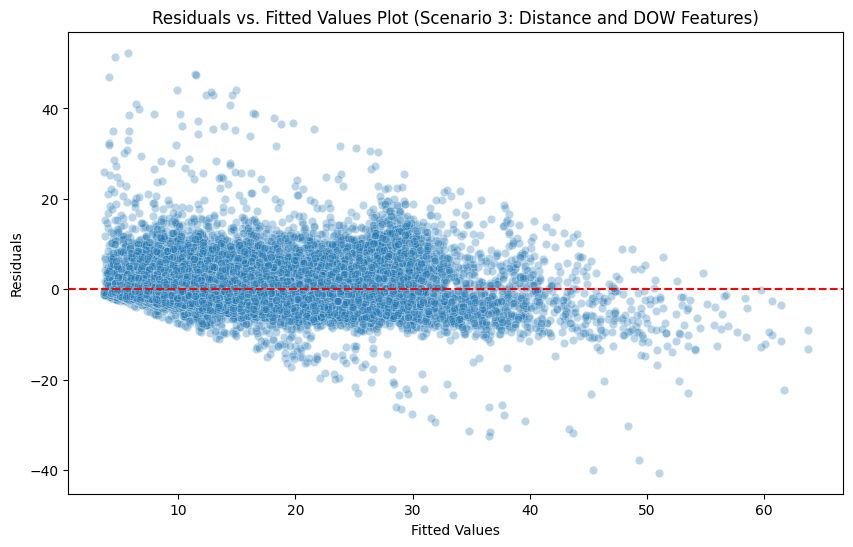

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Get the predicted values and residuals
y_pred = sklearn_model.predict(X_train) # Assuming X_train is also available
residuals = y_train - y_pred

# Create a residuals vs. fitted values plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title(f'Residuals vs. Fitted Values Plot ({model_name})') # Added model_name to title
plt.show()

The residuals vs. fitted values plot shows a slight pattern, but majority of the residuals have no discernable pattern. However, there are some outliers. There is some slight Heteroscedasticity.

## Check for Normality of Residuals

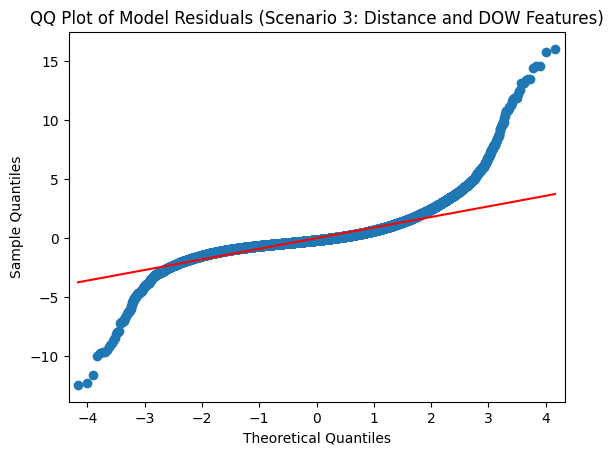

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats # Import scipy.stats

# Get the residuals from the fitted statsmodels OLS model
residuals = sm_model.resid

# Generate the QQ plot
fig = sm.qqplot(residuals, line='r', fit=True) # line='r' adds a red reference line, fit=True fits a line to the data
plt.title(f'QQ Plot of Model Residuals ({model_name})')
plt.show()

Unfortunately in this case the QQ plot shows a snake pattern which means the residuals are NOT normally distributed which violates one of the assumptions of the linear regression.

## Check for Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Create a DataFrame to store VIFs
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                   for i in range(X_train.shape[1])]

display(vif_data)

,feature,VIF
0,distance,2.019976
1,dow_mon,1.141555
2,dow_tue,1.153201
3,dow_wed,1.158439
4,dow_thu,1.179444
5,dow_fri,1.194805
6,dow_sat,1.192533


VIF is great, low variance inflation so there is little multicollinearity.

# Conclusion for using simple Linear Regression

Overall, an adjusted R-square of 0.80 for using distance and day of week is quite high, majority of it is distance. The main issue is that using only distance to estimate taxi fare is difficult without the time. Many of the outliers are most likely one of the following real-world scenarios:

* inaccurate GPS tracking location
* perhaps an Uber driver was asked to make a roundabout trip or made to return back to the original location. We do not have the full route or distance travelled

# Further improvements

We can potentially use Ridge Regression or LASSO regression and include much more features (e.g. dow_hour) and see what improvements can be made.